# Step 1: Import Necessary Libraries

In [1]:
!pip install --upgrade numpy matplotlib pandas scipy scikit-learn seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

# Step 2: Load the Dataset

In [4]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 25.7M/25.7M [00:00<00:00, 48.7MB/s]

Extracting files...


Path to dataset files: C:\Users\rajan\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1


In [6]:
import os

# List files in the downloaded directory
downloaded_files = os.listdir(path)
print("Files in the downloaded directory:", downloaded_files)

Files in the downloaded directory: ['IMDB Dataset.csv']


In [7]:
import pandas as pd

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'IMDB Dataset.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# Step 3: Explore the Dataset

In [8]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")  # Should be (50000, 2)

# Check the column names
print(df.columns)  # Should be ['review', 'sentiment']

# Check the distribution of sentiments
print(df['sentiment'].value_counts())

# Display some sample reviews
print(df['review'].sample(5))

Dataset shape: (50000, 2)
Index(['review', 'sentiment'], dtype='object')
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
3304     That was one of the lines in a trailer about t...
41771    Note: I couldn't force myself to actually writ...
29226    I have this movie on a collection of inexpensi...
35804    Yes, I spelled that right. This movie is so pr...
7109     This is one of the worst films I have *ever* s...
Name: review, dtype: object


# Step 4: Preprocess the Data

In [9]:
# Convert sentiment labels to binary values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Verify the conversion
print(df['sentiment'].value_counts())

sentiment
1    25000
0    25000
Name: count, dtype: int64


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Step 5: Feature Extraction

In [17]:
# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check the shape of the transformed data
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

Training data shape: (40000, 5000)
Testing data shape: (10000, 5000)


# Step 6: Train a Sentiment Analysis Model

In [14]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Step 7: Evaluate the Model

Accuracy: 0.85


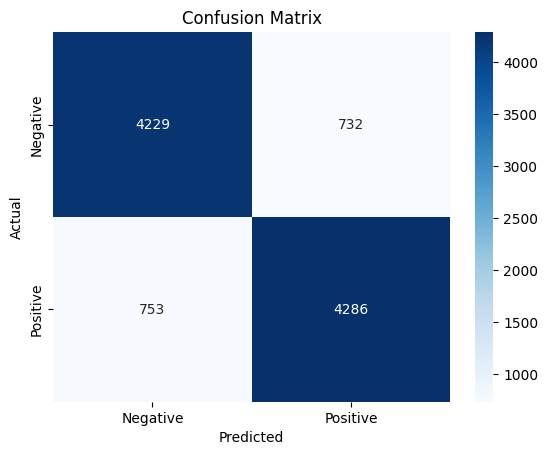

              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      4961
    Positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Step 8: Visualize the Results

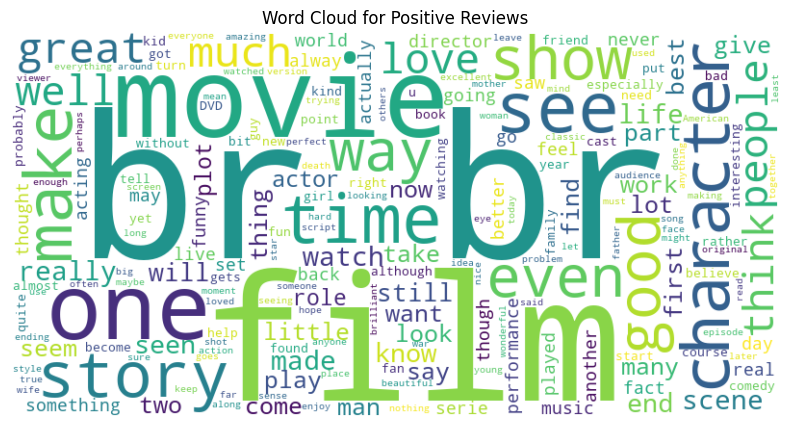

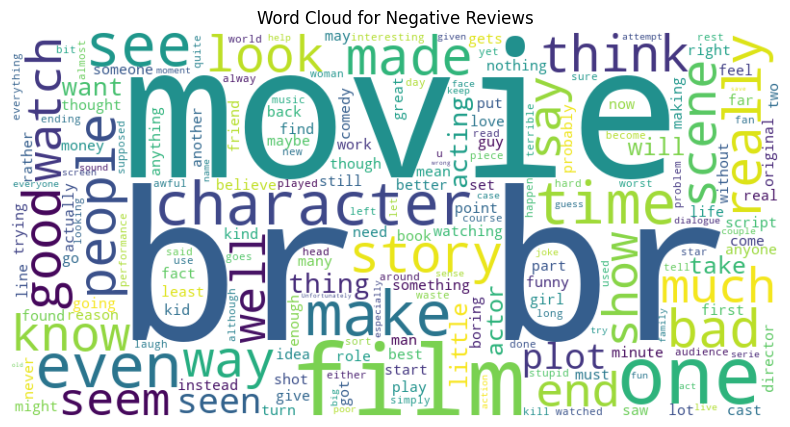

In [16]:
# Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews
negative_reviews = ' '.join(df[df['sentiment'] == 0]['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Step 9: Save the Model (Optional)

In [18]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_analysis_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [19]:
# Load the model
model = joblib.load('sentiment_analysis_model.pkl')

# Load the TF-IDF vectorizer
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Step 10: Make Predictions on New Data

In [20]:
# Example new review
new_review = ["This movie was absolutely fantastic! I loved every moment of it."]

# Transform the new review using the TF-IDF vectorizer
new_review_tfidf = tfidf.transform(new_review)

# Predict sentiment
prediction = model.predict(new_review_tfidf)
print("Predicted sentiment:", "Positive" if prediction[0] == 1 else "Negative")

Predicted sentiment: Positive


# Step 11: Improve the Model (Optional)

Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for the model.

Advanced Models: Try more advanced models like Logistic Regression, Support Vector Machines (SVM), or even deep learning models (e.g., LSTM, BERT).

Feature Engineering: Experiment with different feature extraction techniques (e.g., word embeddings like Word2Vec or GloVe).